# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import l1_min_c
from sklearn.ensemble import RandomForestClassifier
import tensorflow.keras as keras

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")

df = pd.read_csv(adultDataSet_filename, header = 0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [4]:
df.count()

age               32399
workclass         30725
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        30718
relationship      32561
race              32561
sex_selfID        32561
capital-gain      32561
capital-loss      32561
hours-per-week    32236
native-country    31978
income_binary     32561
dtype: int64

I am changing my label to be predict income_binary based on features such as education, workclass, age, occupation, and relationship status and then test for accuracy by using a confusion matrix. I wasn't aware that the label has to be a part of the data so sorry for the mistake prior.

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
# Display basic information about the data
print(df.shape)
print(df.info())

(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB
None


In [6]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

       hours-per-week  
count    32236.000000  
mean        40.450428  
std         12.353748  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [8]:
# Calculate the correlation matrix
correlation_matrix_df = df.corr()
correlation_matrix_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076267,0.036761,0.124901,0.057545,0.067066
fnlwgt,-0.076267,1.000000,-0.043195,-0.002234,-0.010252,-0.018130
education-num,0.036761,-0.043195,1.000000,0.167089,0.079923,0.147256
capital-gain,0.124901,-0.002234,0.167089,1.000000,-0.055138,0.101594
capital-loss,0.057545,-0.010252,0.079923,-0.055138,1.000000,0.054500
hours-per-week,0.067066,-0.018130,0.147256,0.101594,0.054500,1.000000


In [9]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [11]:
# Do not need these features as they don't help the target
# And have a varity of missing values that aren't worth averaging since they can bias the data which can cause over or under fitting
df.drop(columns = ['fnlwgt', 'capital-gain', 'capital-loss', 'education-num', 'native-country', 'marital-status', 'race', 'sex_selfID'], inplace=True)

In [12]:
missing_values = df.isnull().sum()
missing_values

age                162
workclass         1836
education            0
occupation        1843
relationship         0
hours-per-week     325
income_binary        0
dtype: int64

In [13]:
# Fill in mean values inplace of the numerical missing values
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

mean_hoursperweek = df['hours-per-week'].mean()
df['hours-per-week'] = df['hours-per-week'].fillna(mean_hoursperweek)

In [14]:
# Calculate if there are any missing values within AGE specifically : NO MORE MISSING VALUES
age_missing_sum = df['age'].isna().sum()
age_missing_sum

0

In [15]:
# Calculate if there are any missing values : NO MORE MISSING VALUES
missing_values = df.isnull().sum()
missing_values

age                  0
workclass         1836
education            0
occupation        1843
relationship         0
hours-per-week       0
income_binary        0
dtype: int64

In [16]:
# Fill in mode values inplace of the categorical missing values of:

# workclass
def replace_with_mode(df, workclass):
    mode_value = df['workclass'].mode()[0]
    df['workclass'].fillna(mode_value, inplace=True)
    
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    replace_with_mode(df, column)
    
# occupation
def replace_with_mode(df, occupation):
    mode_value = df['occupation'].mode()[0]
    df['occupation'].fillna(mode_value, inplace=True)
    
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    replace_with_mode(df, column)
    
# education
def replace_with_mode(df, education):
    mode_value = df['education'].mode()[0]
    df['education'].fillna(mode_value, inplace=True)
    
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    replace_with_mode(df, column)
    
# relationship
def replace_with_mode(df, relationship):
    mode_value = df['relationship'].mode()[0]
    df['relationship'].fillna(mode_value, inplace=True)
    
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    replace_with_mode(df, column)

In [17]:
# Calculate if there are any missing values : NO MORE MISSING VALUES
missing_values = df.isnull().sum()
missing_values

age               0
workclass         0
education         0
occupation        0
relationship      0
hours-per-week    0
income_binary     0
dtype: int64

In [18]:
# Create a new column 'income_over_50k' based on 'income_binary'
df['income_over_50k'] = df['income_binary'].apply(lambda x: True if x == '>50K' else False)
df.head()

,age,workclass,education,occupation,relationship,hours-per-week,income_binary,income_over_50k
0,39.0,State-gov,Bachelors,Adm-clerical,Not-in-family,40.0,<=50K,False
1,50.0,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,13.0,<=50K,False
2,38.0,Private,HS-grad,Handlers-cleaners,Not-in-family,40.0,<=50K,False
3,53.0,Private,11th,Handlers-cleaners,Husband,40.0,<=50K,False
4,28.0,Private,Bachelors,Prof-specialty,Wife,40.0,<=50K,False


In [19]:
# Perform one-hot encoding on 'occupation', 'workclass', 'education', and 'relationship'
df_encoded = pd.get_dummies(df, columns=['occupation', 'workclass', 'education', 'relationship'])

# Display the DataFrame after one-hot encoding
print(df_encoded)

        age  hours-per-week income_binary  income_over_50k  \
0      39.0            40.0         <=50K            False   
1      50.0            13.0         <=50K            False   
2      38.0            40.0         <=50K            False   
3      53.0            40.0         <=50K            False   
4      28.0            40.0         <=50K            False   
...     ...             ...           ...              ...   
32556  27.0            38.0         <=50K            False   
32557  40.0            40.0          >50K             True   
32558  58.0            40.0         <=50K            False   
32559  22.0            20.0         <=50K            False   
32560  52.0            40.0          >50K             True   

       occupation_Adm-clerical  occupation_Armed-Forces  \
0                            1                        0   
1                            0                        0   
2                            0                        0   
3                  

In [20]:
# Count the occurrences of each unique value in a specific column
value_counts_occupation = df['occupation'].value_counts()
value_counts_workclass = df['workclass'].value_counts()
value_counts_education = df['education'].value_counts()
value_counts_relationship = df['relationship'].value_counts()

print(value_counts_occupation)
print(value_counts_workclass)
print(value_counts_education)
print(value_counts_relationship)

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education

In [21]:
df.count()

age                32561
workclass          32561
education          32561
occupation         32561
relationship       32561
hours-per-week     32561
income_binary      32561
income_over_50k    32561
dtype: int64

Is it worth keeping BOTH workclass and occupation (more likely need occupation) -- maybe do One-Hot Encoding to these columns to get numerical values. Get the different options for workclass and occupation and find the mode categorical value to replace. 

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [22]:
# Create features (X) by excluding the 'income_binary' column
X = df_encoded.drop(columns = ['income_over_50k', 'income_binary'], axis=1)

# Create the label (y) by selecting the 'income_binary' column
y = df_encoded['income_over_50k']

# Display the features and label
print("Features (X):")
print(X)
print("\nLabel (y):")
print(y)

Features (X):
        age  hours-per-week  occupation_Adm-clerical  occupation_Armed-Forces  \
0      39.0            40.0                        1                        0   
1      50.0            13.0                        0                        0   
2      38.0            40.0                        0                        0   
3      53.0            40.0                        0                        0   
4      28.0            40.0                        0                        0   
...     ...             ...                      ...                      ...   
32556  27.0            38.0                        0                        0   
32557  40.0            40.0                        0                        0   
32558  58.0            40.0                        1                        0   
32559  22.0            20.0                        1                        0   
32560  52.0            40.0                        0                        0   

       occupa

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [24]:
X_train.head()

,age,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,...,education_Masters,education_Preschool,education_Prof-school,education_Some-college,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
29187,31.0,99.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
23535,59.0,40.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14450,21.0,40.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2727,32.0,40.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18474,20.0,20.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [25]:
# Create the  Scikit-learn LogisticRegression model object below
model = LogisticRegression(max_iter=1000, C = 1.0)

# Fit the model to the training data below
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# y Predictions
y_pred = model.predict(X_test)

# Make predictions on the test data using the predict_proba() method
proba_predictions = model.predict_proba(X_test)

# Make predictions on the test data using the predict() method
class_label_predictions = model.predict(X_test)
print(class_label_predictions)
print(y_pred)


# Create a confusion matrix
c_m = confusion_matrix(y_test, class_label_predictions, labels=[True, False])

[ True  True False ... False False False]
[ True  True False ... False False False]


In [30]:
conf_mat = pd.DataFrame(c_m, columns=['Predicted: Income over 50k', 'Predicted: Income not over 50k'],
                            index=['Actual: Income over 50k', 'Actual: Income not over 50k'])

In [33]:
# Evaluate the model's performance and compute and print the model's accuracy score
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy score: ' + str(acc_score))

# Create a confusion matrix
c_m = confusion_matrix(y_test, class_label_predictions, labels=[True, False])

precision = precision_score(y_test, class_label_predictions)
recall = recall_score(y_test, class_label_predictions)
f1 = f1_score(y_test, class_label_predictions)

# Display the evaluation metrics
print("Precision (for >50K class):", precision)
print("Recall (for >50K class):", recall)
print("F1-score (for >50K class):", f1)
print("Confusion Matrix:")
print(c_m)

Accuracy score: 0.8255796100107478
Precision (for >50K class): 0.6644295302013423
Recall (for >50K class): 0.518324607329843
F1-score (for >50K class): 0.5823529411764706
Confusion Matrix:
[[ 792  736]
 [ 400 4585]]


In [34]:
cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [4.164575257133461e-06,
  1.2196560690776658e-05,
  3.571939117416488e-05,
  0.00010460940081394059,
  0.00030636375310245,
  0.0008972305403216784,
  0.0026276693451288457,
  0.007695509545243951,
  0.022537412201700326,
  0.06600406974522817,
  0.19330246010250754,
  0.5661141991078955,
  1.657947272174504,
  4.8555382670891,
  14.22014575424034,
  41.64575257133461]}

In [35]:
print('Running Grid Search...')

# Create a LogisticRegression model object with the argument max_iter=10000 and save the model object
model_2 = LogisticRegression(max_iter = 10000)

Running Grid Search...


In [36]:
# Run a grid search with 5-fold cross-validation and assign the output to the object 'grid'
grid = GridSearchCV(model_2, param_grid, cv=5)

# Fit the model on the training data and assign the fitted model to the variable 'grid_search'
grid_search = grid.fit(X_train, y_train)

print('Done')

Done


In [37]:
best_c = grid_search.best_params_['C']
best_c

4.8555382670891

In [38]:
model_best = LogisticRegression(max_iter = 1000, C = best_c)

# Fit the model to the training data below
model_best.fit(X_train, y_train)

LogisticRegression(C=4.8555382670891, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
proba_predictions_best = model_best.predict_proba(X_test)[:, 1]
class_label_predictions_best = model_best.predict(X_test)

In [40]:
# Compute and print the model's accuracy score
acc_score = accuracy_score(y_test, class_label_predictions_best)
print('Accuracy score: ' + str(acc_score))

Accuracy score: 0.8261937663135268


In [41]:
# Evaluate the model's performance and compute and print the model's accuracy score
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy score: ' + str(acc_score))

precision = precision_score(y_test, class_label_predictions)
recall = recall_score(y_test, class_label_predictions)
f1 = f1_score(y_test, class_label_predictions)

# display the evaluation metrics
print("Precision (for >50K class):", precision)
print("Recall (for >50K class):", recall)
print("F1-score (for >50K class):", f1)
print("Confusion Matrix:")
print(c_m)

Accuracy score: 0.8255796100107478
Precision (for >50K class): 0.6644295302013423
Recall (for >50K class): 0.518324607329843
F1-score (for >50K class): 0.5823529411764706
Confusion Matrix:
[[ 792  736]
 [ 400 4585]]


In [42]:
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

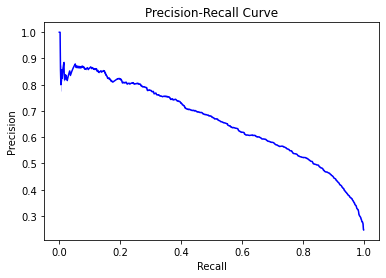

In [43]:
# Creating line plot
sns.lineplot(x=recall_best, y=precision_best, color='blue')

# Setting plot title and labels
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Displaying the plot
plt.show()

In [44]:
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

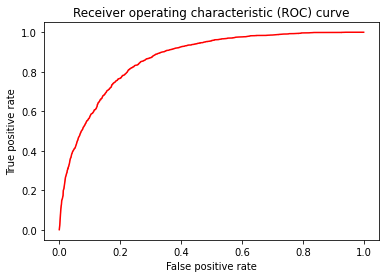

In [45]:
# Creating line plot
sns.lineplot(x=fpr_best, y=tpr_best, color='red')

# Setting plot title and labels
plt.title('Receiver operating characteristic (ROC) curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# Displaying the plot
plt.show()

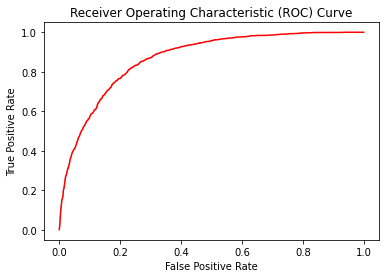

In [46]:
# Creating line plot for best hyperparameter
sns.lineplot(x=fpr_best, y=tpr_best, color='red')

# Setting plot title and labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Displaying the plot
plt.show()

In [47]:
# Compute the AUC for the best model calculated
auc_best = auc(fpr_best, tpr_best)

print(auc_best)

0.8678951120376838


Accuracy Represnted Above as 86% (best I could get) - End of CODE